In [1]:
import matplotlib
import numpy as np
import scipy as sp
import netCDF4 as nc
import cmocean as cm
from scipy.io import loadmat
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import os

%matplotlib inline

from salishsea_tools import viz_tools, places, nc_tools
from salishsea_tools import visualisations as vis

In [2]:
def make_prefix(date, path, res):
    """Construct path prefix for local SalishSeaCast results given date object and paths dict
    e.g., /results2/SalishSea/nowcast-green.201905/daymonthyear/SalishSea_1d_yyyymmdd_yyyymmdd
    """

    datestr = '_'.join(np.repeat(date.strftime('%Y%m%d'), 2))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path, f'{folder}/SalishSea_1{res}_{datestr}')
    
    return prefix

In [3]:
#define paths
NEMO = '/results2/SalishSea/nowcast-green.201905/'
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
thalweg_in = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'

coords = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask=xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

### Summer - typical estuarine flow

In [15]:
day = datetime(2020, 6, 1)

x_size_of_plot = 11
y_size_of_plot = 10
stepsize = 0.1
do_I_want_to_save_fig = False
titlefontsize = 20
cbarfontsize = 18
cbartickfontsize = 18
axistickfontsize = 18

In [16]:
# plotXR = xr.open_dataset(make_prefix(day,NEMO,'h')+'_grid_U.nc')
# plotXR = plotXR.resample(time_counter="D").mean(dim="time_counter")

# nc_file = "grid_U.nc"
# plotXR.to_netcdf(nc_file)

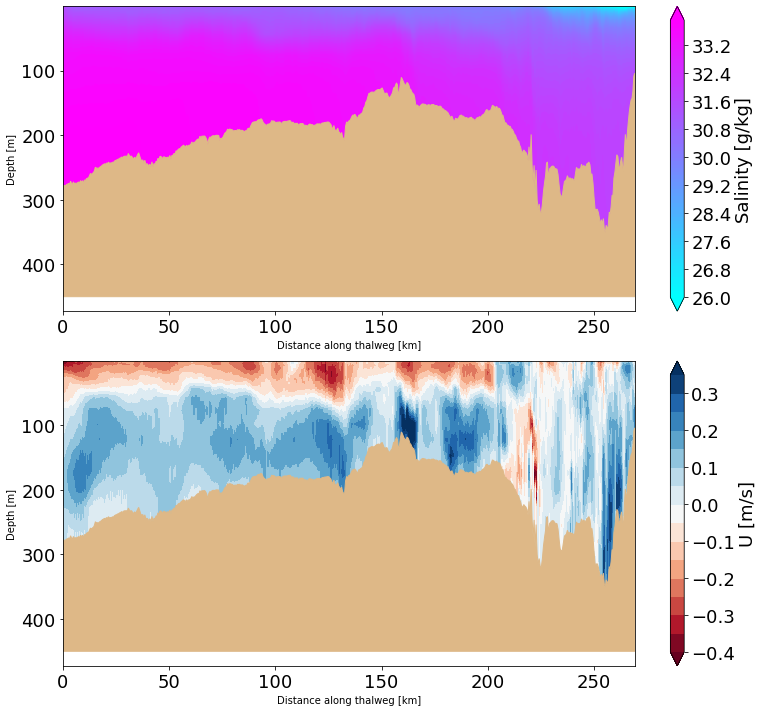

In [17]:
#SUMMER
tit = 'Typical Estuarine Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 34, stepsize), cmap = 'cool', thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
#ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset('grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = 'RdBu', thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

#### Just top 150 m (typically little to no perceivable motion bellow this in ocean parcels run)

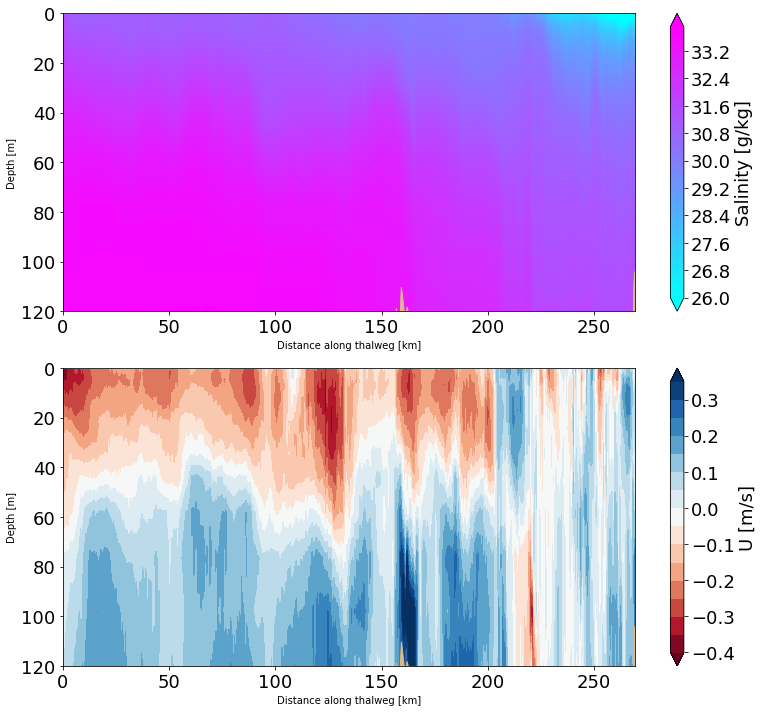

In [19]:
#SUMMER
tit = 'Typical Estuarine Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 34, stepsize), cmap = 'cool', thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
ax1.set_ylim(150,0)

#velocity
nc_to_plot = nc.Dataset('grid_U.nc')
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = 'RdBu', thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
ax2.set_ylim(150,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

## Reverse Flow

In [40]:
day = datetime(2020, 1, 19)
#tested
#Jan 4 
#Jan 5
#Jan 6
#Jan 21 
#jan 19 #BEST
#jan 20

do_I_want_to_save_fig = False

In [41]:
# plotXR = xr.open_dataset(make_prefix(day,NEMO,'h')+'_grid_U.nc')
# plotXR = plotXR.resample(time_counter="D").mean(dim="time_counter")

# nc_file = "grid_U_r_"+day.strftime('%Y%m%d')+'.nc'
# plotXR.to_netcdf(nc_file)

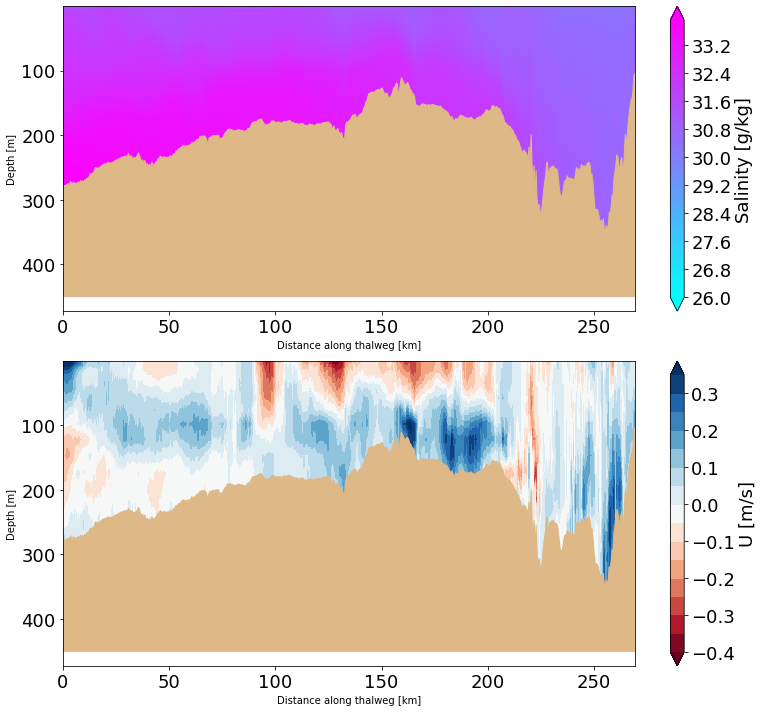

In [43]:
#REVERSE
tit = 'Reverse Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 34, stepsize), cmap = 'cool', thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,269)
#ax1.set_ylim(120,0)

#velocity
nc_to_plot = nc.Dataset(nc_file)
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = 'RdBu', thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,269)
# #ax2.set_ylim(120,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

#### Just top 150 m

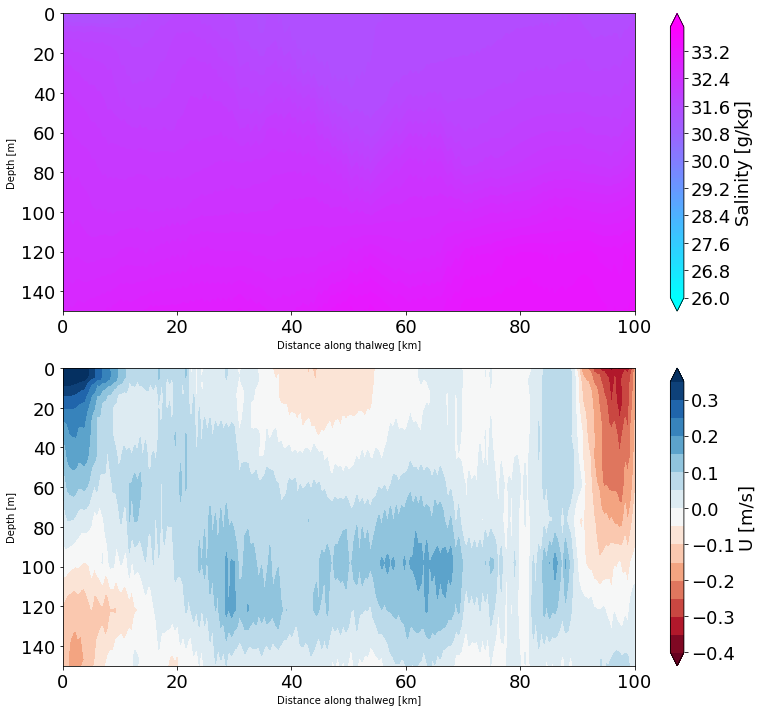

In [46]:
#REVERSE
tit = 'Reverse Flow'

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(x_size_of_plot,y_size_of_plot))
#salinity
nc_to_plot = nc.Dataset(make_prefix(day,NEMO,'d')+'_grid_T.nc')
variable_to_plot = 'vosaline' #votemper for temperature
data_to_plot =  nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax1, data_to_plot, bathy, mesh, np.arange(26, 34, stepsize), cmap = 'cool', thalweg_file=thalweg_in)
#ax1.set_title(tit , fontsize = titlefontsize)
cbar.set_label('Salinity [g/kg]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax1.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax1.set_xlim(0,100)
ax1.set_ylim(150,0)

#velocity
nc_to_plot = nc.Dataset(nc_file)
variable_to_plot = 'vozocrtx' 
data_to_plot = nc_to_plot[variable_to_plot][0,:,:,:]

cbar = vis.contour_thalweg(ax2, data_to_plot, bathy, mesh, np.arange(-0.4, 0.4, 0.05), cmap = 'RdBu', thalweg_file=thalweg_in)
#ax2.set_title(tit , fontsize = titlefontsize)
cbar.set_label('U [m/s]', fontsize = cbarfontsize)
cbar.ax.tick_params(labelsize=cbartickfontsize) 
ax2.tick_params(axis='both', which='major', labelsize=axistickfontsize)
ax2.set_xlim(0,100)
ax2.set_ylim(150,0)

fig.tight_layout()
plt.show()

if do_I_want_to_save_fig == True:
    fig.savefig(day.strftime('"%d%b%y"')+'_sal.png')

## Study Area

In [36]:
def plot_thalweg(ax, T_lon, T_lat):
    lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
    lines = lines.astype(int)

    thalweg_lon = T_lon[lines[:,0],lines[:,1]]
    thalweg_lat = T_lat[lines[:,0],lines[:,1]]
    ax.plot(thalweg_lon, thalweg_lat, 'r')

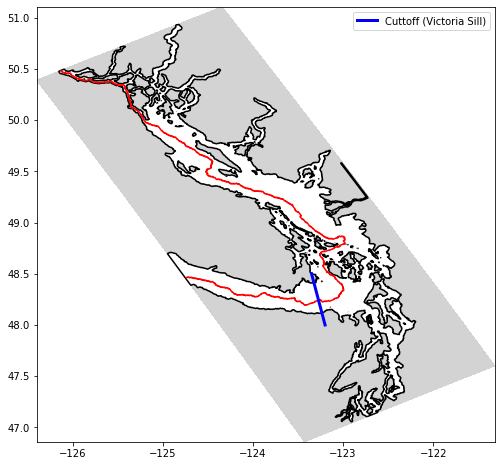

In [53]:
# Plot Basemap
x, y = coords.nav_lon.values, coords.nav_lat.values

fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#ax.set_xlim([-124.8, -122.7])
#ax.set_ylim([48, 49.2])
ax.set_aspect(5/4.4)
nmin, nmax = 0, -1

plot_thalweg(ax, x, y)

# Box around model domain
ax.plot([-123.35,-123.2], [48.5, 48], 'b-',zorder=6, label="Cuttoff (Victoria Sill)", linewidth=3.0)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
plt.legend()